## **Diamond Price Prediction Projects**
### **Business Understanding**
Diamonds are among the most valuable natural substances, primarily composed of carbon. Unlike gold or silver, pricing diamonds is more complex due to various features influencing their value, such as structure, cut, carat, clarity, and inclusions (impurities).

The pricing system for diamonds is standardized globally through the "four Cs" — Cut, Color, Clarity, and Carat, which allows uniform understanding and ease of trade. These metrics determine the quality and price of diamonds.

### **Understanding the 4 C's**
- **Cut:** Refers to how well a diamond is cut, impacting its brilliance.
- **Color:** A measure of how colorless a diamond is (ranging from D, which is colorless, to J, - which is light yellow).
- **Clarity:** Refers to the internal purity of the diamond (graded from I1, which is the worst, to IF, which is flawless).
- **Carat:** The weight of the diamond.

### **Problem Statement**
We aim to build a system that can predict the price of a diamond based on features such as carat, cut, color, clarity, and its dimensions (x, y, z). This project will walk through steps like data preprocessing, model building, and prediction.

### **Agenda**
In this notebook, we will perform:
- Step:-1) Import necessary libraries and load the datasets
- Step:-2) Preform Exploratory Data Analysis (EDA)
- Step:-3) Split the Data into Train and Test Data
- Step:-4) Data Preparations: Data Cleaning 
- Step:-5) Data Preparations: Feature Transformations (in both train and test data)
- Step:-6) Training and Testing Phase: Building a Models
- Step:-7) Model Evaluation and Predictions

### **Step:-1) Import necessary libraries and load the datasets**

In [172]:
# import neccessary libraries and load the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("Datasets/diamonds.csv")

# Display the few row of the datasets
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [173]:
# Display the columns of the dataset
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [174]:
# Display the shape of the dataset
data.shape

(53940, 10)

In [175]:
# Display the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### **Data Description**

| Feature | Description |
|---------|-------------|
| price   | Price in US dollars (ranging from $326 to $18,823) |
| carat   | Weight of the diamond (0.2 - 5.01) |
| cut     | Quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color   | Diamond color (ranging from J, the worst, to D, the best) |
| clarity | Measurement of how clear the diamond is (I1 to IF) |
| x       | Length in mm (0 - 10.74) |
| y       | Width in mm (0 - 58.9) |
| z       | Depth in mm (0 - 31.8) |
| depth   | Total depth percentage (43 - 79) |
| table   | Width of the top of the diamond (43 - 95) |


### **Step:-2) Preform Exploratory Data Analysis (EDA)**
- A) Univariate Analysis ---> Numerical Columns (carat, depth and table)
- B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)
- C) Univariate Analysis ---> Numerical Columns (x, y, z)
- D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)
- E) Univariate Analysis ---> Categorical Columns (cut, color and clarity)
- F) Bivariate Analysis ---> Numerical (Target column: Price) vs Categorical Columns (cut, color and clarity)

#### **A) Univariate Analysis ---> Numerical Columns (carat, depth and table)**


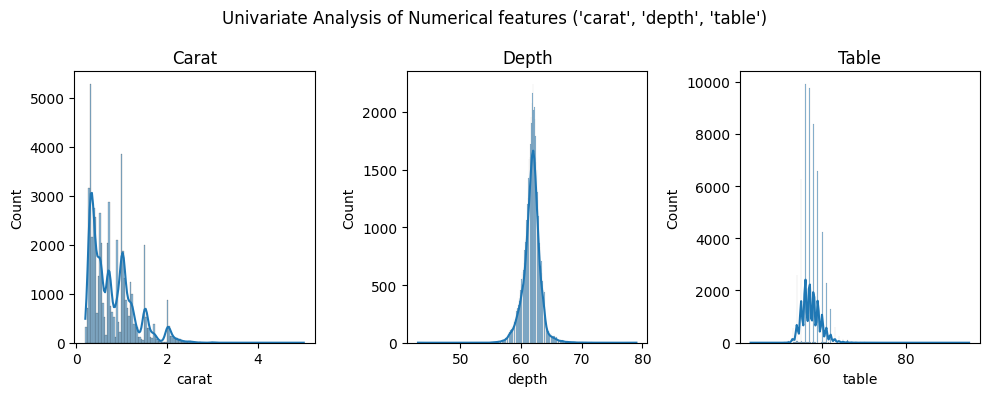

In [176]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features ('carat', 'depth', 'table')")

# Plot the histogram of carat features
ax[0].set_title("Carat")
sns.histplot(data=data, x='carat', kde=True, ax=ax[0])

# Plot the histogram of depth features
ax[1].set_title("Depth")
sns.histplot(data=data, x='depth', kde=True, ax=ax[1])

# Plot the histogram of table features
ax[2].set_title("Table")
sns.histplot(data=data, x='table', kde=True, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

#### **B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)**


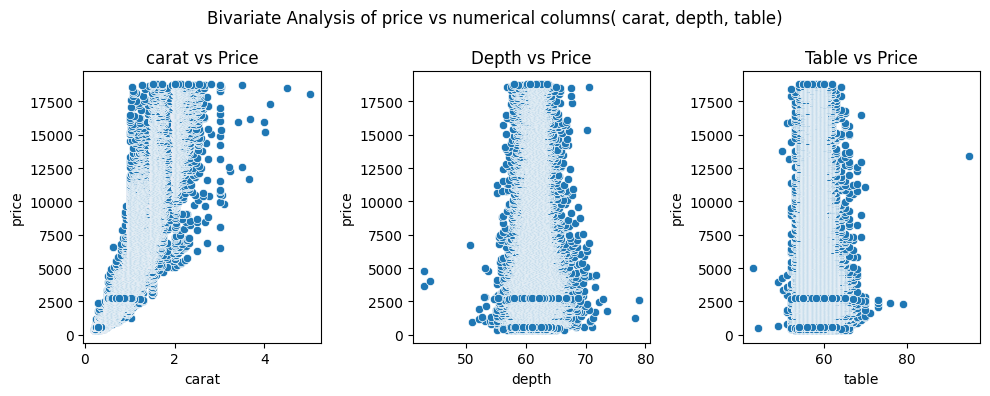

In [177]:
# Create a 1x3 grid of subplots for scatter plots
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Bivariate Analysis of price vs numerical columns( carat, depth, table)")

# Plot the scatter plot of carat vs price
ax[0].set_title("carat vs Price")
sns.scatterplot(data=data, x = "carat", y = "price", ax=ax[0])

# Plot the scatter plot of depth vs price
ax[1].set_title("Depth vs Price")
sns.scatterplot(data=data, x = "depth", y = "price", ax=ax[1])

# Plot the scatter plot of table vs price
ax[2].set_title("Table vs Price")
sns.scatterplot(data=data, x = "table", y = "price", ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

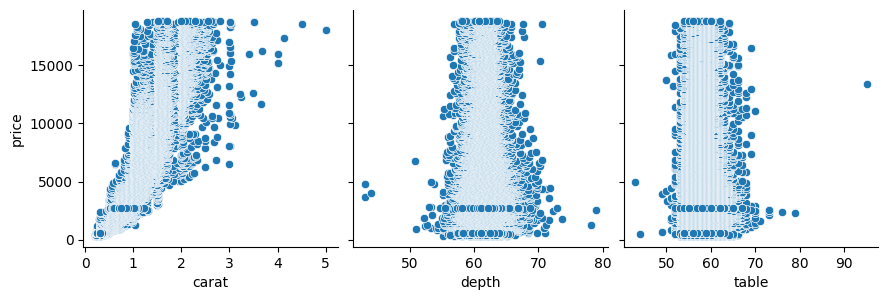

In [178]:
# Pairplot to visualize the relationship between 'price' and selected numerical features
sns.pairplot(data=data, x_vars=["carat", "depth", "table"], y_vars="price", height=3)
plt.show()

#### **C) Univariate Analysis ---> Numerical Columns (x, y, z)**


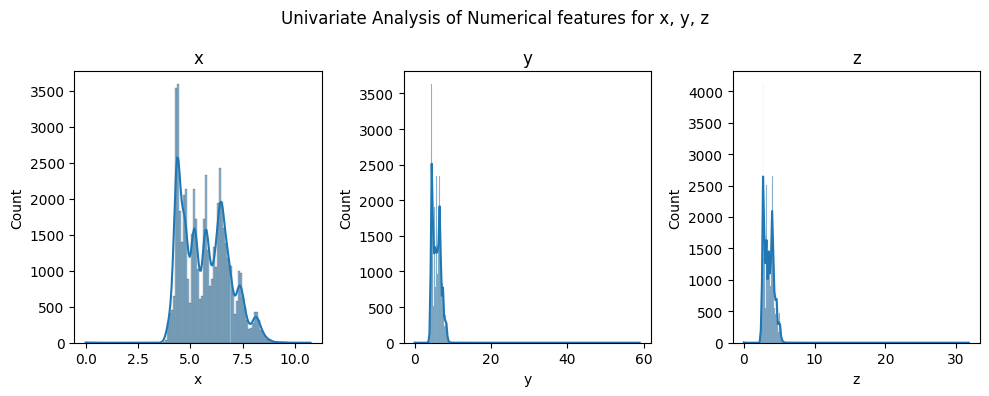

In [179]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features for x, y, z")

# Plot the histogram of x features
ax[0].set_title("x")
sns.histplot(data=data, x='x', kde=True, ax=ax[0])

# Plot the histogram of y features
ax[1].set_title("y")
sns.histplot(data=data, x='y', kde=True, ax=ax[1])

# Plot the histogram of z features
ax[2].set_title("z")
sns.histplot(data=data, x='z', kde=True, ax=ax[2])

plt.tight_layout()
plt.show()

#### **D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)**


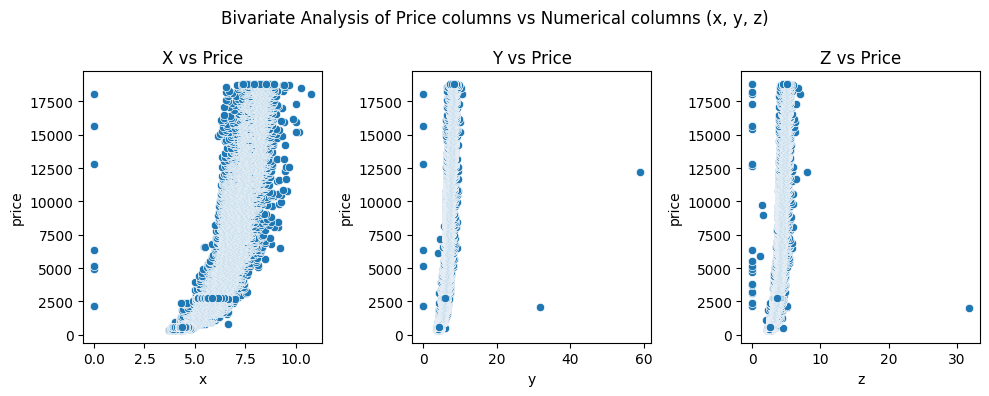

In [180]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle("Bivariate Analysis of Price columns vs Numerical columns (x, y, z)")

# Plot the scatter plot of x vs rice
ax[0].set_title("X vs Price")
sns.scatterplot(data=data, x = "x", y = "price", ax=ax[0])

# Plot the scatter plot of y vs price
ax[1].set_title("Y vs Price")
sns.scatterplot(data=data, x = "y", y = "price", ax=ax[1])

# Plot the scatter plot of z vs price
ax[2].set_title("Z vs Price")
sns.scatterplot(data=data, x = "z", y = "price", ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

#### **E) Univariate Analysis ---> Categorical Columns (cut, color and clarity)**

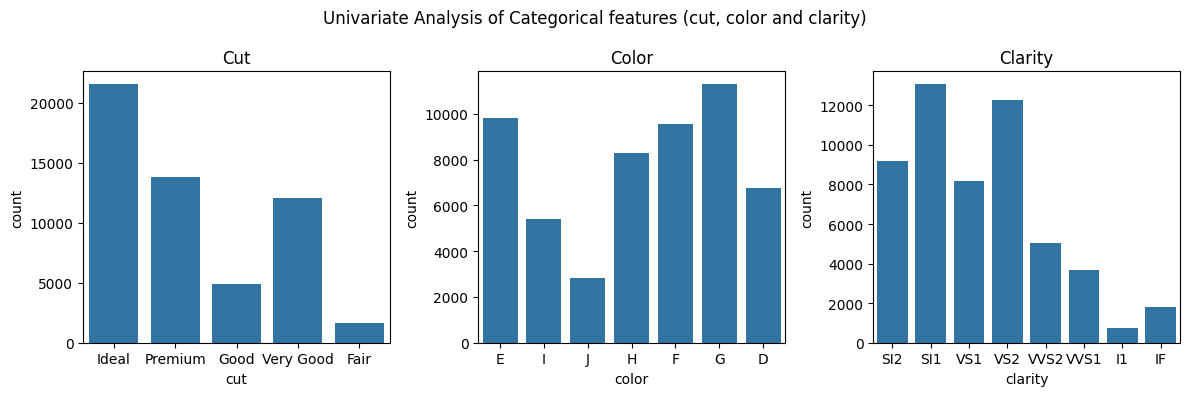

In [181]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle("Univariate Analysis of Categorical features (cut, color and clarity)")

# Plot the count plot of cut feature
ax[0].set_title("Cut")
sns.countplot(data=data, x='cut', ax=ax[0])

# Plot the count plot of color feature
ax[1].set_title("Color")
sns.countplot(data=data, x='color', ax=ax[1])

# Plot the count plot of clarity feature
ax[2].set_title("Clarity")
sns.countplot(data=data, x='clarity', ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

#### **F) Bivariate Analysis ---> Numerical (Target column: Price) vs Categorical Columns (cut, color and clarity)**


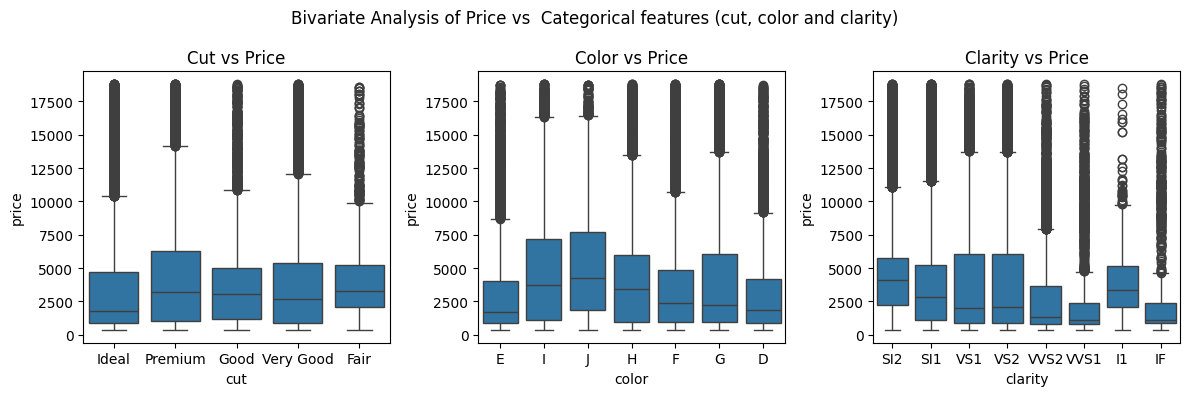

In [182]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Bivariate Analysis of Price vs  Categorical features (cut, color and clarity)")

# Plot the box plot of cut vs price
ax[0].set_title("Cut vs Price")
sns.boxplot(data=data, x='cut', y='price', ax=ax[0])

# Plot the box plot of color vs price
ax[1].set_title("Color vs Price")
sns.boxplot(data=data, x='color', y='price', ax=ax[1])

# Plot the box plot of clarity vs price
ax[2].set_title("Clarity vs Price")
sns.boxplot(data=data, x='clarity', y='price', ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

### **Step:-3) Split the data into Train and Test data**
     - A) Segregate into input(X) and output(y) (predictor and target variables)
     - B) Split the data into train and test data

#### **A) Segregate into input(X) and output(y) (predictor and target variables)**


In [183]:
# convert the data into predictors and target variables
X = data.drop(columns = "price")
y = data["price"]

#### **B) Split the data into train and test data**

In [184]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of the training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40455, 9)
Shape of X_test: (13485, 9)
Shape of y_train: (40455,)
Shape of y_test: (13485,)


##### =====> After splitting the data into training and testing sets, data cleaning (handling missing value etc) and transformations (like scaling and encoding) should only be applied to the input features (X_train and X_test), not the target variable (y_train, y_test).

##### =====> We apply these transformations separately on X_train and X_test to avoid data leakage.

### **Step:-4) Data Preparations: Data Cleaning**
- #### **A) Data Cleaning Process in Training Data:**
     - **a) Handling Missing Values:**
          - Impute missing values with mean, median, or mode.
          - Remove rows with missing values if they are negligible.
     - **b) Change Data Types:**
          - Convert data types to appropriate formats (e.g., strings to datetime).
          - Ensure all numerical values are in the correct numeric format.
     - **c) Drop Duplicate Values:**
          - Identify and remove duplicate rows to avoid redundancy.
     - **d) Outlier Detection and Removal using (IQR or Z-score) etc**

- #### **B) Data Cleaning Process in Testing Data:**
     - **a) Handling Missing Values:**
          - Impute missing values using statistics from the training data (e.g., mean, median).
          - Avoid removing rows with missing values based on the test data itself to prevent leakage.
     - **b) Change Data Types:**
          - Convert data types to appropriate formats (e.g., strings to datetime) just like in the training data.
          - Ensure numerical columns are in the correct format, without deriving new information from the test data.
     - **c) Drop Duplicate Values:**
          - Identify and remove duplicates, as this process doesn't involve any leakage. Duplicate rows in test data won't introduce bias.
     - **d) Do not detect or remove outliers in the test data**, as this requires information about the distribution, which should come from the training set.


#### **A) Data Cleaning Process in Training Data:**

In [185]:
# Display information about the X_train data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40455 entries, 35965 to 15795
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


In [186]:
# Check the missing values in the X_train data set
X_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [187]:
# Filling missing values with mean for numerical columns
# X_train.fillna(X_train.mean(), inplace=True)

# Alternatively, you can use median or mode
# X_train['column_name'].fillna(X_train['column_name'].median(), inplace=True)
# X_train['column_name'].fillna(X_train['column_name'].mode()[0], inplace=True)

# But in my data, there is no any missing value. Sothat, I will not apply. 

In [188]:
# Checking for duplicates
duplicates = X_train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 207


In [189]:
# Dropping duplicate rows
X_train.drop_duplicates(inplace=True)

##### **d) Outlier Detection and Removal etc**

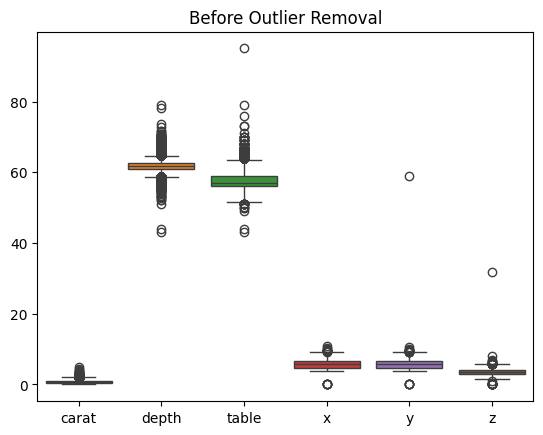

In [190]:
# Define the numerical columns to check for outliers
num_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Boxplot before outlier removal
sns.boxplot(data=X_train[num_columns])
plt.title("Before Outlier Removal")
plt.show()

In [191]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = X_train[num_columns].quantile(0.25)
Q3 = X_train[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Filtering out outliers for single columns
# data = X_train[(X_train['numeric_column'] >= lower_bound) & (X_train['numeric_column'] <= upper_bound)]

# Filter out outliers for multiple columns
X_train_filtered = X_train[~((X_train[num_columns] < lower_bound) | (X_train[num_columns] > upper_bound)).any(axis=1)]
# .any(axis=1) ensures that the condition applies row-wise across the columns.


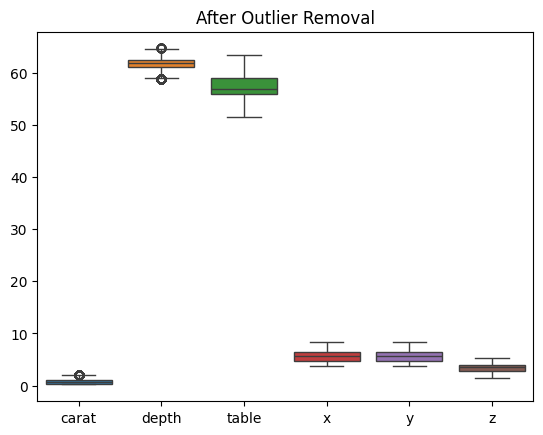

In [192]:
# Boxplot after outlier removal
sns.boxplot(data=X_train_filtered[num_columns])
plt.title("After Outlier Removal")
plt.show()

In [193]:
# Check the number of rows before and after
print("Number of rows before outlier removal:", X_train.shape[0])
print("Number of rows after outlier removal:", X_train_filtered.shape[0])

Number of rows before outlier removal: 40248
Number of rows after outlier removal: 36824


In [194]:
# Display the number of columns presents in X_train data
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [195]:
# check the unique values in the "clarity" column
X_train["clarity"].unique()

array(['VVS2', 'SI1', 'VS2', 'SI2', 'VS1', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [196]:
# check the unique values in the "color" column
X_train["color"].unique()

array(['E', 'J', 'F', 'G', 'D', 'H', 'I'], dtype=object)

In [197]:
# check the unique values in the "cut" column
X_train["cut"].unique()

array(['Good', 'Ideal', 'Premium', 'Fair', 'Very Good'], dtype=object)

#### **B) Data Cleaning Process in Testing Data:**

In [198]:
# Disaply the info of X_test data
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13485 entries, 1388 to 4204
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [199]:
# Checks for missing values in the X_test Data
X_test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [200]:
# Handling missing values in test data (using mean from training data)

# Filling missing values with mean for numerical columns
# X_test.fillna(X_train.mean(), inplace=True)

# Alternatively, you can use median or mode
# X_test['column_name'].fillna(X_train['column_name'].median(), inplace=True)
# X_test['column_name'].fillna(X_train['column_name'].mode()[0], inplace=True)

# But in my data, there is no any missing value. Sothat, I will not apply same as training data. 

In [201]:
# Checking for duplicates
duplicates = X_test.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 28


In [202]:

# Dropping duplicate rows
X_test.drop_duplicates(inplace=True)

#### **Cleaned X_train and X_test Data**

In [203]:
print("Cleaned X_train data")
print(X_train_filtered.head())
print("============================================================")
print("Cleaned X_test data")
print(X_test.head())

Cleaned X_train data
       carat      cut color clarity  depth  table     x     y     z
52281   0.84    Ideal     J     SI1   61.8   56.0  6.04  6.07  3.74
6957    1.05  Premium     J     VS2   61.1   58.0  6.56  6.51  3.99
9163    1.02    Ideal     F     SI2   60.7   56.0  6.53  6.50  3.95
50598   0.61    Ideal     F     VS1   61.8   57.0  5.43  5.47  3.37
17933   1.16    Ideal     G     VS2   61.7   57.0  6.80  6.72  4.17
Cleaned X_test data
       carat        cut color clarity  depth  table     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0  7.44  7.37  4.61


### **Step:-5) Data Preparations: Feature Transformations (in both train and test data)**
 - #### **A) Apply Feature Transformations in Training data**
      - ##### **a) Numerical Feature Transformation**
         - Normalization
         - Standardization (We will use this method in this project)

      - ##### **b) Categorical Feature Transformation**
         - One Hot Encoding
         - Label Encoding
         - Ordinal Encoding (We will use this method in this project)

 - #### **B) Apply Feature Transformations in Testing Data**
      - ##### **a) Numerical Feature Transformation**
         - Normalization
         - Standardization (We will use this method in this project)

      - ##### **b) Categorical Feature Transformation**
         - One Hot Encoding
         - Label Encoding
         - Ordinal Encoding (We will use this method in this project)

##### **For our project:**
- Use Ordinal Encoding for categorical features like cut, color, and clarity, as they have an inherent order.
- If working with linear models or distance-based models like KNN, use One-Hot Encoding.
- **One-Hot Encoding** is ideal for unordered categorical variables (nominal data). 
- **Ordinal Encoding** is better for ordered variables (ordinal data). 
- **Label Encoding** works well with tree-based models but may cause issues with non-tree models by imposing artificial ordinal relationships.
- **Normalization:** Scales data to a range (typically between 0 and 1) without altering the data distribution.
- **Standardization:** Scales data based on the mean (0) and standard deviation (1).

#### **A) Apply Feature Transformations in Training data**
- ##### **a) Numerical Feature Transformation**
        - Standardization
- ##### **b) Categorical Feature Transformation**
        - Ordinal Encoding

In [204]:
# Separating numerical and categorical features
X_train_num = X_train_filtered.select_dtypes(include = ["int64", "float64"])
X_train_cat = X_train_filtered.select_dtypes(include = ["object"])

In [205]:
# Display the few row of the X_train_num data
X_train_num.head()

,carat,depth,table,x,y,z
52281,0.84,61.8,56.0,6.04,6.07,3.74
6957,1.05,61.1,58.0,6.56,6.51,3.99
9163,1.02,60.7,56.0,6.53,6.50,3.95
50598,0.61,61.8,57.0,5.43,5.47,3.37
17933,1.16,61.7,57.0,6.80,6.72,4.17


In [206]:
# Display the few row of the X_train_cat data
X_train_cat.head()

,cut,color,clarity
52281,Ideal,J,SI1
6957,Premium,J,VS2
9163,Ideal,F,SI2
50598,Ideal,F,VS1
17933,Ideal,G,VS2


#### **a) Numerical Feature Transformation: Apply Standardization**

In [207]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
standardizer = StandardScaler()

# Fit and transform the numerical features
X_train_num_standardized = standardizer.fit_transform(X_train_num)

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed numerical features back to a DataFrame
X_train_num_standardized = pd.DataFrame(X_train_num_standardized, 
                                        columns = standardizer.get_feature_names_out(),
                                        index = X_train_num.index)

# Display the few row of the standardized numerical features
X_train_num_standardized.head()

,carat,depth,table,x,y,z
52281,0.247750,0.019498,-0.633647,0.411683,0.438436,0.422533
6957,0.772019,-0.613242,0.358853,0.918499,0.869691,0.816578
9163,0.697123,-0.974808,-0.633647,0.889259,0.859889,0.753531
50598,-0.326450,0.019498,-0.137397,-0.182851,-0.149639,-0.160653
17933,1.046636,-0.070894,-0.137397,1.152414,1.075517,1.100290


In [208]:
# Let's now analyse the properties of 'std_scaler'
print("Number of numerical features:", standardizer.n_features_in_)
print("Output feature names:", standardizer.get_feature_names_out())
print("Mean of each column:", standardizer.mean_)
print("Variations of each column:", standardizer.var_)
print("Std of each column:", np.sqrt(standardizer.var_))

Number of numerical features: 6
Output feature names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.740762   61.77842983 57.27687106  5.61760781  5.6226738   3.47192537]
Variations of each column: [0.16044632 1.22389954 4.06068627 1.05270363 1.04096735 0.40252159]
Std of each column: [0.40055751 1.10629993 2.01511445 1.02601347 1.02027807 0.63444589]


In [209]:
# Dispaly the statistics for each column of the dataset
X_train_num_standardized.describe()

,carat,depth,table,x,y,z
count,3.682400e+04,3.682400e+04,3.682400e+04,3.682400e+04,3.682400e+04,3.682400e+04
mean,9.049656e-17,-2.730333e-16,-1.384655e-15,-1.057208e-15,-1.015240e-15,-1.277372e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.350023e+00,-2.692244e+00,-2.817146e+00,-1.839750e+00,-1.904063e+00,-3.060821e+00
25%,-9.006497e-01,-6.132422e-01,-6.336469e-01,-9.235822e-01,-9.239381e-01,-9.329801e-01
50%,-1.017632e-01,1.098890e-01,-1.373972e-01,-7.414922e-03,-1.242191e-02,-3.034734e-03
75%,6.971234e-01,6.522374e-01,8.551023e-01,8.307807e-01,8.304856e-01,8.362803e-01
max,3.143713e+00,2.640848e+00,3.088226e+00,2.653369e+00,2.594710e+00,2.881372e+00


#### **b) Categorical Feature Transformation: Apply Ordinal Encoding**


In [210]:
# Count the number of unique features in each categorical columns
cut_category = X_train_cat["cut"].unique()
print(cut_category)

color_category = X_train_cat["color"].unique()
print(color_category)

clarity_category = X_train_cat["clarity"].unique()
print(clarity_category)

['Ideal' 'Premium' 'Fair' 'Good' 'Very Good']
['J' 'F' 'G' 'D' 'H' 'E' 'I']
['SI1' 'VS2' 'SI2' 'VS1' 'IF' 'VVS2' 'VVS1' 'I1']


In [211]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[cut_category,color_category,clarity_category],
                                 handle_unknown="use_encoded_value",
                                 unknown_value= -1,
                                 encoded_missing_value=-5)

# Fit and transform the categorical features
# Note: We need to fit the encoder on the training data only, not the entire dataset
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

# column names are (annoyingly) lost after OrdinalEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed categorical features back to a DataFrame
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, 
                                    columns = ordinal_encoder.get_feature_names_out(),
                                    index = X_train_cat.index)

# Display the few row of the encoded categorical features

X_train_cat_encoded.head()

,cut,color,clarity
52281,0.0,0.0,0.0
6957,1.0,0.0,1.0
9163,0.0,1.0,2.0
50598,0.0,1.0,3.0
17933,0.0,2.0,1.0


In [212]:
# Let's now analyse the properties of 'ordinal_encoder'
print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Ideal', 'Premium', 'Fair', 'Good', 'Very Good'], dtype=object), array(['J', 'F', 'G', 'D', 'H', 'E', 'I'], dtype=object), array(['SI1', 'VS2', 'SI2', 'VS1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)]
Feature Names after encoding: ['cut' 'color' 'clarity']


In [213]:
# Statistics on X_train_cat_encoded
X_train_cat_encoded.describe()

,cut,color,clarity
count,36824.000000,36824.000000,36824.000000
mean,1.432245,3.090593,2.139203
std,1.627882,1.749685,1.938960
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,1.000000,3.000000,2.000000
75%,3.000000,5.000000,3.000000
max,4.000000,6.000000,7.000000


##### **Concatenate both X_train_num_standardized and X_train_cat_encoded**

In [214]:
# concatenate both X_train_num_standardized and X_train_cat_encoded
X_train_transformed = pd.concat([X_train_num_standardized, X_train_cat_encoded], axis=1)

# Display the few row of the transformed dataset
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52281,0.247750,0.019498,-0.633647,0.411683,0.438436,0.422533,0.0,0.0,0.0
6957,0.772019,-0.613242,0.358853,0.918499,0.869691,0.816578,1.0,0.0,1.0
9163,0.697123,-0.974808,-0.633647,0.889259,0.859889,0.753531,0.0,1.0,2.0
50598,-0.326450,0.019498,-0.137397,-0.182851,-0.149639,-0.160653,0.0,1.0,3.0
17933,1.046636,-0.070894,-0.137397,1.152414,1.075517,1.100290,0.0,2.0,1.0


In [215]:
# Checking the shape of X_train_transformed data
X_train_transformed.shape

(36824, 9)

In [216]:
# Checking the shape of y_train data
y_train.shape

(40455,)

=====> In the dataset, X_train_transformed and y_train have different shapes, which can cause problems when building the model. To fix this, we align y_train with the filtered X_train so that both have the same number of rows. Doing this won't cause data leakage because we're only cleaning the training data.

In [217]:
# Filter out corresponding rows in y_train
y_train_filtered = y_train.loc[X_train_filtered.index]

# Now X_train_filtered and y_train_filtered have the same number of rows

======> Data leakage typically occurs when information from the test set leaks into the training set or when preprocessing steps are performed on the entire dataset before splitting it into training and test sets. In this case, since we're only filtering out outliers from the training set (X_train).

======> By removing outliers from X_train and ensuring that y_train is aligned with those changes, we're simply cleaning the training data. As long as we don't perform any preprocessing that uses information from y_train (like removing outliers based on the target variable). So,We're safe from data leakage.

=======> So, removing outliers from X_train and aligning y_train based on the filtered X_train won't cause data leakage.

In [218]:
# Checking the shape of y_train dataset
y_train_filtered.shape

(36824,)

#### **A) Apply Feature Transformations in Testing data**
- ##### **a) Numerical Feature Transformation**
        - Standardization
- ##### **b) Categorical Feature Transformation**
        - Ordinal Encoding

In [219]:
# Separate the numerical and categorical features
X_test_num = X_test.select_dtypes(include=["int64", "float64"])
X_test_cat = X_test.select_dtypes(include = ["object"])

In [220]:
# Display the few row of the X_test_num data
X_test_num.head()

,carat,depth,table,x,y,z
1388,0.24,62.1,56.0,3.97,4.00,2.47
50052,0.58,60.0,57.0,5.44,5.42,3.26
41645,0.40,62.1,55.0,4.76,4.74,2.95
42377,0.43,60.8,57.0,4.92,4.89,2.98
17244,1.55,62.3,55.0,7.44,7.37,4.61


In [221]:
# Display the few row of the X_test_cat data
X_test_cat.head()

,cut,color,clarity
1388,Ideal,G,VVS1
50052,Very Good,F,VVS2
41645,Ideal,E,VVS2
42377,Premium,E,VVS2
17244,Ideal,E,SI2


##### **a) Numerical Features Transformation: -  Apply Standardization**

In [222]:
# Fit and transform the numerical features
X_test_num_standardized = standardizer.transform(X_test_num)

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed numerical features back to a DataFrame
X_test_num_standardized = pd.DataFrame(X_test_num_standardized, 
                                        columns = standardizer.get_feature_names_out(),
                                        index = X_test_num.index)

# Display the few row of the standardized numerical features
X_test_num_standardized.head()

,carat,depth,table,x,y,z
1388,-1.250163,0.290672,-0.633647,-1.605834,-1.590423,-1.579213
50052,-0.401346,-1.607548,-0.137397,-0.173105,-0.198646,-0.334032
41645,-0.850719,0.290672,-1.129897,-0.835864,-0.865131,-0.822648
42377,-0.775824,-0.884416,-0.137397,-0.679921,-0.718112,-0.775362
17244,2.020279,0.471455,-1.129897,1.776187,1.712598,1.793809


##### **b) Categorical Features Transformation: - Apply Ordinal Encoding**

In [223]:
# Fit and transform the categorical features
X_test_cat_encoded = ordinal_encoder.transform(X_test_cat)

# column names are (annoyingly) lost after OrdinalEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed categorical features back to a DataFrame
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, 
                                    columns = ordinal_encoder.get_feature_names_out(),
                                    index = X_test_cat.index)

# Display the few row of the encoded categorical features
X_test_cat_encoded.head()

,cut,color,clarity
1388,0.0,2.0,6.0
50052,4.0,1.0,5.0
41645,0.0,5.0,5.0
42377,1.0,5.0,5.0
17244,0.0,5.0,2.0


##### **Concatenate both X_test_num_standardized and X_test_cat_encoded**

In [224]:
# Concatenate both X_test_num_standardized and X_test_cat_encoded
X_test_transformed = pd.concat([X_test_num_standardized, X_test_cat_encoded], axis = 1)

# Display the few row of the transformed dataset
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
1388,-1.250163,0.290672,-0.633647,-1.605834,-1.590423,-1.579213,0.0,2.0,6.0
50052,-0.401346,-1.607548,-0.137397,-0.173105,-0.198646,-0.334032,4.0,1.0,5.0
41645,-0.850719,0.290672,-1.129897,-0.835864,-0.865131,-0.822648,0.0,5.0,5.0
42377,-0.775824,-0.884416,-0.137397,-0.679921,-0.718112,-0.775362,1.0,5.0,5.0
17244,2.020279,0.471455,-1.129897,1.776187,1.712598,1.793809,0.0,5.0,2.0


In [225]:
# Check the shape of X_test_transformed data
X_test_transformed.shape

(13457, 9)

In [226]:
# Check the shape of y_test data
y_test.shape

(13485,)

=====> Dropping duplicates from X_test and aligning y_test with X_test_filtered does not cause data leakage. This is because you are only cleaning the test data, and you're not using any information from y_test to modify X_test. Thus, this process is safe and maintains the integrity of your evaluation.

In [227]:
# Align y_test with X_test_filtered
y_test_filtered = y_test.loc[X_test.index]

In [228]:
# Check the shape of the y_test_filtered
y_test_filtered.shape

(13457,)

### **Step 6: Training and Testing Phase (Linear Regression)**
- #### **A) Training Phase: Building the Linear Regression model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.
    - ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

#### **A) Training Phase: Building the Linear Regression model by fitting it to the transformed training data.**

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_transformed, y_train_filtered)

LinearRegression()

#### **B) Model Evaluation and Predictions:**
MAE is one part of model evaluation for regression, model evaluation itself is a broader process that encompasses more than just this one metric.
Other regression metrics include Mean Squared Error (MSE), R-squared (R²), and Root Mean Squared Error (RMSE).

 - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

In [230]:
%%time

# Predict the target variable for the training set using the trained Linear Regression model
y_train_pred = linear_model.predict(X_train_transformed)

# Calculate the Mean Absolute Error (MAE) between the predicted and actual values in the training set
mae_train = mean_absolute_error(y_train_filtered, y_train_pred)

# Print the MAE value, which gives an indication of how well the model performs on the training data
print("Mean absolute error of linear regressor model is", mae_train)


Mean absolute error of linear regressor model is 776.1034153241442
CPU times: total: 0 ns
Wall time: 4.19 ms


In [231]:
# Creating a DataFrame to compare the actual training data with the predicted values
output_data_for_train = pd.DataFrame({"Actual Trained data": y_train_filtered})

# Adding a new column to the DataFrame with the predictions value
output_data_for_train["Linear Regression Prediction on Training Data"] = y_train_pred

# Displaying the first few rows of the DataFrame to inspect the actual vs predicted values
output_data_for_train.head()


,Actual Trained data,Linear Regression Prediction on Training Data
52281,2493,3895.682261
6957,4145,5618.750714
9163,4541,5669.383422
50598,2283,2445.483886
17933,7243,6463.744272


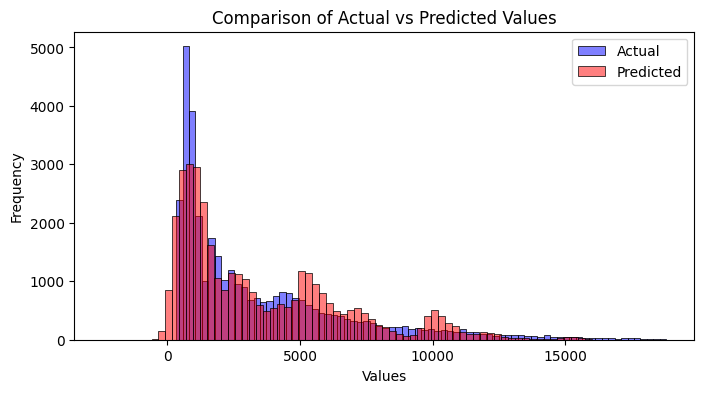

In [232]:
# Plotting histograms to compare the distribution of actual and predicted values
plt.figure(figsize=(8, 4))

# Histogram for actual trained data
sns.histplot(output_data_for_train["Actual Trained data"], alpha=0.5, label='Actual', color='blue')

# Histogram for linear regression predictions on training data
sns.histplot(output_data_for_train["Linear Regression Prediction on Training Data"], alpha=0.5, label='Predicted', color='red')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **B) Model Evaluation and Predictions:**
- ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

In [236]:
%%time

# Predict the target variable for the testing set
y_test_pred = linear_model.predict(X_test_transformed)

# Calculate the Mean Absolute Error (MAE) between the predicted and actual values in the testing set
mae_test = mean_absolute_error(y_test_filtered, y_test_pred)

# Print the MAE value, which gives an indication of how well the model performs on the testing data
print("Mean absolute error of linear regressor model is", mae_test)


Mean absolute error of linear regressor model is 875.9023415910458
CPU times: total: 15.6 ms
Wall time: 7.75 ms


In [237]:
# Creating a DataFrame to compare the actual testing data with the predicted values
output_data_for_test = pd.DataFrame({"Actual Tested data": y_test_filtered})

# Adding a new column to the DataFrame with the predictions value
output_data_for_test["Linear Regression Prediction on Testing Data"] = y_test_pred

# Displaying the first few rows of the DataFrame to inspect the actual vs predicted values
output_data_for_test.head()

,Actual Tested data,Linear Regression Prediction on Testing Data
1388,559,1189.387867
50052,2201,2376.210627
41645,1238,1251.432818
42377,1304,1324.892319
17244,6901,10498.542136


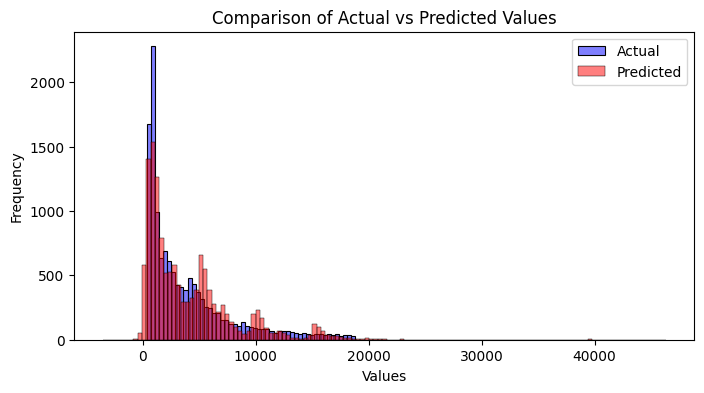

In [239]:
# Plotting histograms to compare the distribution of actual and predicted values
plt.figure(figsize=(8, 4))

# Histogram for actual tested data
sns.histplot(output_data_for_test["Actual Tested data"], alpha=0.5, label='Actual', color='blue')

# Histogram for linear regression predictions on testing data
sns.histplot(output_data_for_test["Linear Regression Prediction on Testing Data"], alpha=0.5, label='Predicted', color='red')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **Step 6: Training and Testing Phase (KNN Regression)**
- #### **A) Training Phase: Building the KNN Regression model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.
    - ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.